# Data Pre-Processing

### Importing the relevent libraries

In [1]:
#pip install xgboost  # package installed.

In [2]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # creates a confusion matrix

from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.

### Importing the dataframe

In [3]:
sucidedataframe = pd.read_csv("who_suicide_statistics.csv")  # opens csv files and assighns them to a variable.

<AxesSubplot:>

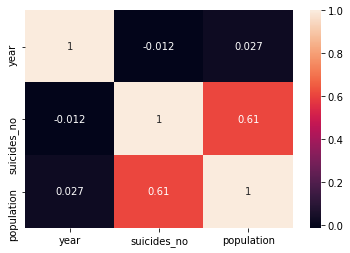

In [4]:
matrix = sucidedataframe.corr().round(26) 
sns.heatmap(data=matrix,annot=True)

### Checking the data from the dataframe before pre-processing

In [5]:
sucidedataframe.head(1)  # Taking a look at the dataframe the first elements of the dataset.

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0


In [6]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [7]:
sucidedataframe.nunique()

country          141
year              38
sex                2
age                6
suicides_no     2231
population     32439
dtype: int64

## 1. Data pre-processing

In [8]:
sucidedataframe.columns  # The columns of the dataframe are viewed.

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [9]:
# Below relevent data is selected that will be used in this project.
sucidedataframe = sucidedataframe[["age", "sex", "population", "suicides_no"]]
sucidedataframe.head(1)  # Taking a look at the dataframe to see if the needed changes have been made.

,age,sex,population,suicides_no
0,15-24 years,female,277900.0,NaN


In [10]:
# Below the col names are renamed.
sucidedataframe = sucidedataframe.set_axis(["Age", "Gender", "Population","Suicide_Committed"],axis=1)
sucidedataframe.head(1)  # Taking a look at the dataframe to see if the needed changes have been made.

,Age,Gender,Population,Suicide_Committed
0,15-24 years,female,277900.0,NaN


In [11]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(43776, 4)

### Dealing with null values

In [12]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Age                     0
Gender                  0
Population           5460
Suicide_Committed    2256
dtype: int64

In [13]:
print('The age range 5-14 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '5-14 years'])) + ' times.')
print('The age range 15-24 years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '15-24 years'])) + ' times.')
print('The age range 25-34 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '25-34 years'])) + ' times.')
print('The age range 35-54 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '35-54 years'])) + ' times.')
print('The age range 55-74 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '55-74 years'])) + ' times.')
print('The age range 75+ years years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '75+ years'])) + ' times.')

The age range 5-14 years years years appears 7296 times.
The age range 15-24 years appears 7296 times.
The age range 25-34 years years appears 7296 times.
The age range 35-54 years years appears 7296 times.
The age range 55-74 years years years appears 7296 times.
The age range 75+ years years years years appears 7296 times.


In [14]:
sucidedataframe = sucidedataframe.dropna() # droping all rows with at least one null values.

In [15]:
print('The age range 5-14 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '5-14 years'])) + ' times.')
print('The age range 15-24 years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '15-24 years'])) + ' times.')
print('The age range 25-34 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '25-34 years'])) + ' times.')
print('The age range 35-54 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '35-54 years'])) + ' times.')
print('The age range 55-74 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '55-74 years'])) + ' times.')
print('The age range 75+ years years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '75+ years'])) + ' times.')

The age range 5-14 years years years appears 6010 times.
The age range 15-24 years appears 6010 times.
The age range 25-34 years years appears 6010 times.
The age range 35-54 years years appears 6010 times.
The age range 55-74 years years years appears 6010 times.
The age range 75+ years years years years appears 6010 times.


In [16]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(36060, 4)

In [17]:
sucidedataframe.describe().round()  # Shows the count, mean, std, min, 25%, 50%, 75% and 
                                    # max of a datframe. Could be useful for feature scaling afterwords.

,Population,Suicide_Committed
count,36060.0,36060.0
mean,1699996.0,222.0
std,3697811.0,855.0
min,259.0,0.0
25%,80566.0,2.0
50%,375765.0,21.0
75%,1344900.0,116.0
max,43805214.0,22338.0


In [18]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                36060 non-null  object 
 1   Gender             36060 non-null  object 
 2   Population         36060 non-null  float64
 3   Suicide_Committed  36060 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


In [19]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Age                  0
Gender               0
Population           0
Suicide_Committed    0
dtype: int64

In [20]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0.0        5936
1.0        2146
2.0        1489
3.0        1129
4.0         907
           ... 
20705.0       1
21063.0       1
21262.0       1
21706.0       1
22338.0       1
Length: 2231, dtype: int64


### initial plot to visulize the data before working on it.

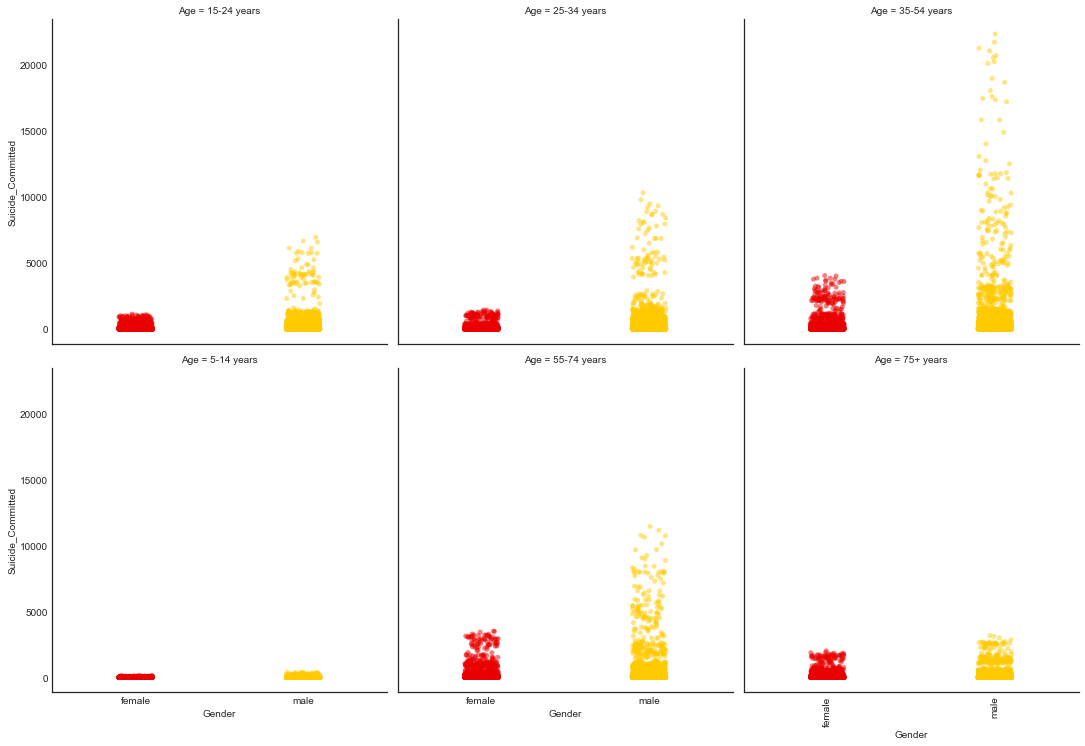

In [22]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.style.use('seaborn-white')
sns.catplot(x='Gender', y="Suicide_Committed", col="Age", col_wrap=3, sharey=True, data=sucidedataframe, alpha=0.5, palette = 'hot')
plt.xticks(rotation = 90)
plt.show()

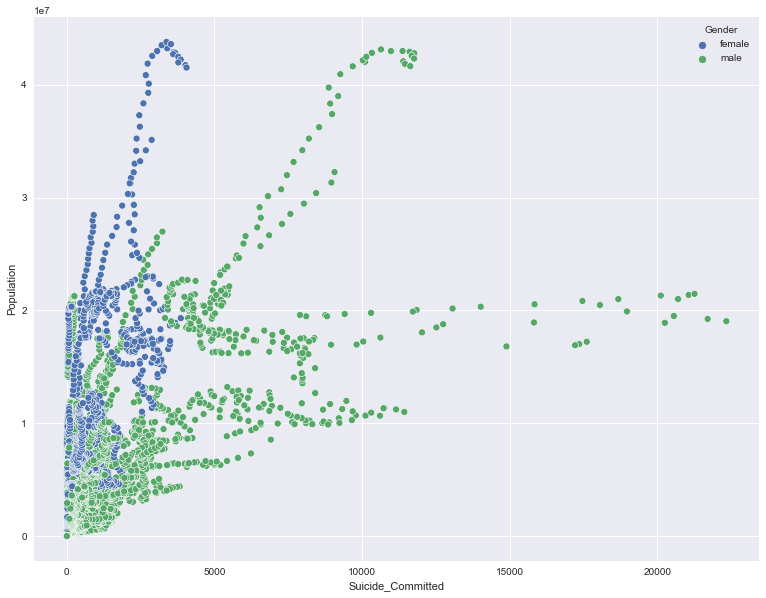

In [23]:
plt.style.use('seaborn')
plt.figure(figsize= (13,10))
sns.scatterplot(x= 'Suicide_Committed', y= 'Population', data = sucidedataframe, hue = 'Gender')
plt.show()

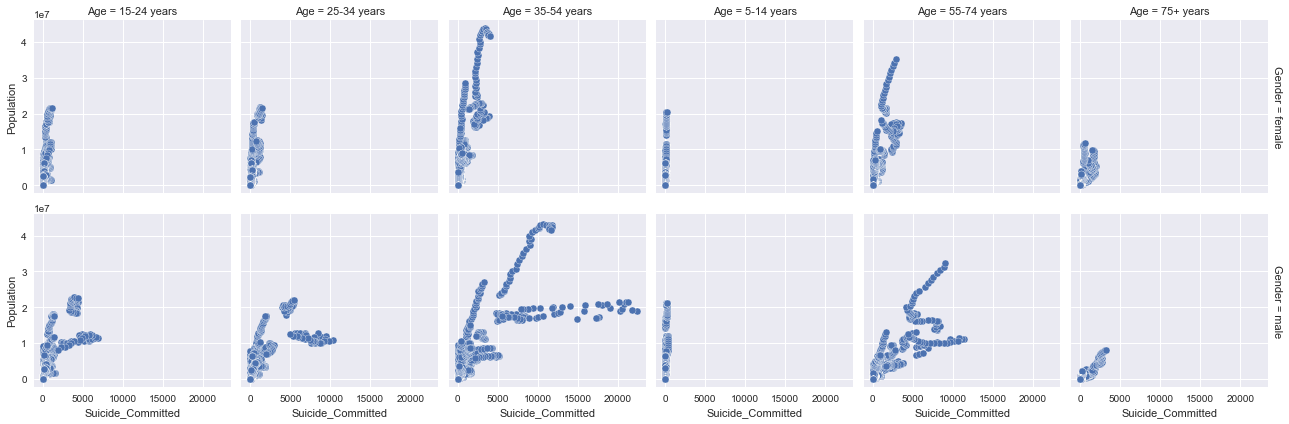

In [24]:
My_plot_object = sns.FacetGrid(sucidedataframe , row = 'Gender',col = 'Age',margin_titles=True)
My_plot_object.map(plt.scatter,"Suicide_Committed",'Population',edgecolor = 'w')
plt.show()